<a href="https://colab.research.google.com/github/sohyun-alicia/deeplearning-tensorflow/blob/main/ch3_2_unsupervised_learning_algorithm_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**주성분 분석(PCA)**

In [2]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN          # 밀도 기반 군집 분석
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [3]:
# 데이터 불러오기
X = pd.read_csv('credit card.csv')
X = X.drop('CUST_ID', axis=1)           # 불러온 데이터에서 'CUST_ID'열(칼럼) 삭제
X.fillna(method='ffill', inplace=True)
print(X.head())                         # 데이터셋 형태 확인

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


In [4]:
# 데이터 전처리 및 데이터를 2차원으로 차원 축소
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)              # 평균이 0, 표준편차가 1이 되도록 데이터 크기 조정

X_normalized = normalize(X_scaled)              # 데이터가 가우스 분포를 따르도록 정규화
X_normalized = pd.DataFrame(X_normalized)       # 넘파일 배열을 데이터프레임(dataframe)으로 변환

pca = PCA(n_components=2)                       # 2차원으로 차원 축소 선언
X_principal = pca.fit_transform(X_normalized)   # 차원 축소 적용
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519098  0.544829
2  0.330634  0.268882
3 -0.481657 -0.097617
4 -0.563512 -0.482504


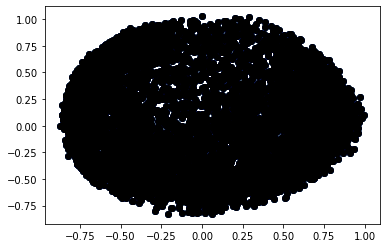

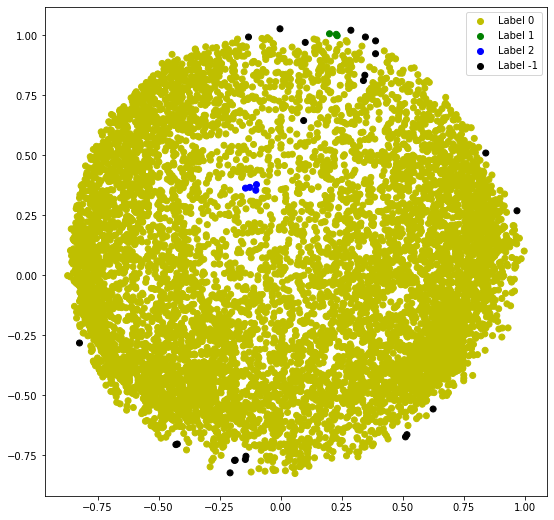

In [5]:
# DBSCAN 모델 생성 및 결과의 시각화
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)         # 모델 생성 및 훈련
labels = db_default.labels_                                             # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 labels에 저장

colours = {}                                  # 출력 그래프의 색상을 위한 레이블 생성
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]     # 각 데이터 포인트에 대한 색상 벡터 생성

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k')        # 플롯(plot)의 범례(legend) 구성

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)               # 정의된 색상 벡터에 따라 X축에 P1, Y축에 P2 플로팅(plotting)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) # 범례 구축
plt.show()

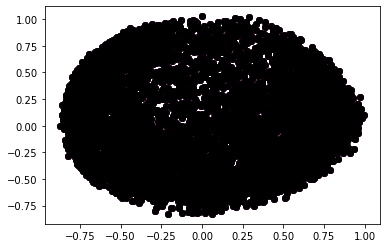

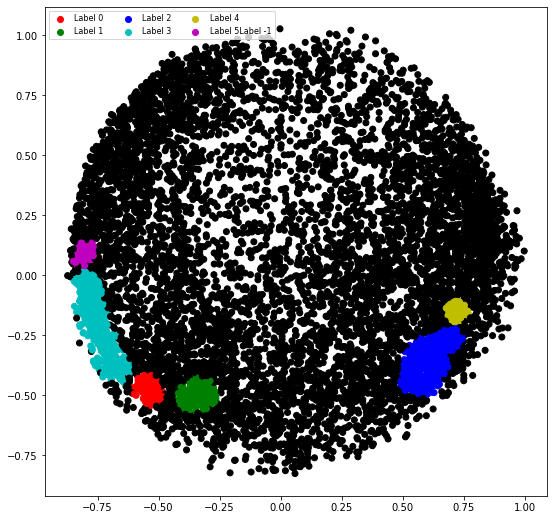

In [15]:
# 모델 튜닝

db_default = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)         # 모델 생성 및 훈련
labels1 = db_default.labels_                                             # 각 데이터 포인트에 할당된 모든 클러스터 레이블의 넘파일 배열을 labels에 저장

colours1 = {}                                  # 출력 그래프의 색상을 위한 레이블 생성
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]     # 각 데이터 포인트에 대한 색상 벡터 생성

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[3])        # 플롯(plot)의 범례(legend) 구성
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[-1])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)               # 정의된 색상 벡터에 따라 X축에 P1, Y축에 P2 플로팅(plotting)

plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5' 'Label -1'),
           scatterpoints=1,
           loc='upper left', 
           ncol=3,
           fontsize=8) 
plt.show()

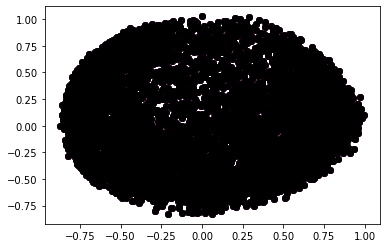

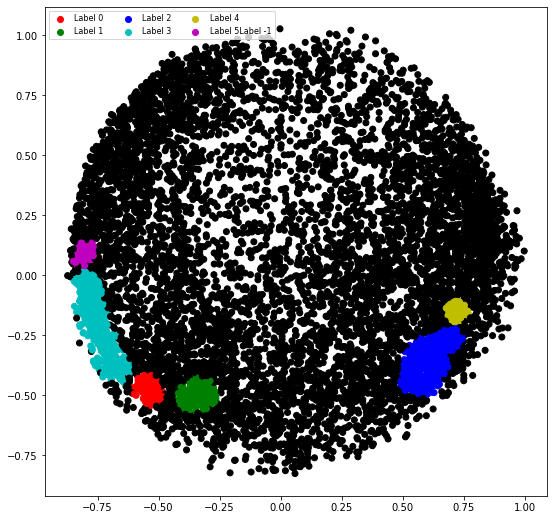

In [18]:
# min_samples를 50에서 100으로 변경

db = DBSCAN(eps=0.0375, min_samples=100).fit(X_principal)
labels1 = db_default.labels_    


colours1 = {}                                  # 출력 그래프의 색상을 위한 레이블 생성
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]     # 각 데이터 포인트에 대한 색상 벡터 생성

r = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[0])
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[1])
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[2])
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[3])        # 플롯(plot)의 범례(legend) 구성
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[4])
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[5])
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker='o', color=colours1[-1])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)               # 정의된 색상 벡터에 따라 X축에 P1, Y축에 P2 플로팅(plotting)

plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5' 'Label -1'),
           scatterpoints=1,
           loc='upper left', 
           ncol=3,
           fontsize=8) 
plt.show()

**K-평균 군집화**

In [20]:
# 라이브러리 호출

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
# 상품에 대한 연 지출 데이터(sales data.cvs) 호출
data = pd.read_csv('sales data.csv')
data.head() 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [22]:
# 연속형 데이터와 명목형 데이터로 분류
categorical_features = ['Channel', 'Region']      # 명목형 데이터
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']  # 연속형 데이터

for col in categorical_features:
  dummies = pd.get_dummies(data[col], prefix=col)   # 명목형 데이터는 판다스의 get_dummies() 메서드를 사용하여 바이너리로 변환
  datat = pd.concat([data, dummies], axis=1)
  data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [23]:
# 데이터 전처리(스케일링 적용)
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)


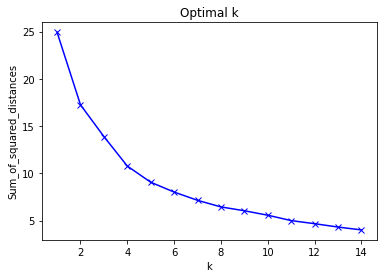

In [24]:
# 적당한 K값 추출
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()